<a href="https://colab.research.google.com/github/Isha-Ismail/Network-Intrusion-Implementation/blob/main/Deep%20Learning/UNSW%20NB15/Binary_UNSW_NB15_(New_Approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install wget

You should consider upgrading via the 'g:\pycharm projects\machine learning\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import wget
data = wget.download('https://dl.dropboxusercontent.com/s/h2hx685o62qhnsr/UNSW_NB15_training-set.csv?dl=0')

100% [........................................................................] 15380800 / 15380800

## Loading data

In [ ]:
bin_data = pd.read_csv(data)
# bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
# le1_classes_ = np.load('labels/le1_classes.npy',allow_pickle=True)

In [ ]:
bin_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
bin_data['attack_cat']= label_encoder.fit_transform(bin_data['attack_cat'])
bin_data['proto']= label_encoder.fit_transform(bin_data['proto'])
bin_data['state']= label_encoder.fit_transform(bin_data['state'])
bin_data['service']= label_encoder.fit_transform(bin_data['service'])

<AxesSubplot:title={'center':'Continuous features'}>

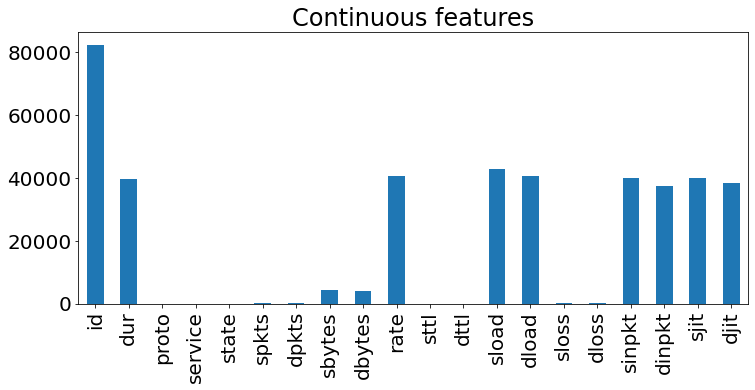

In [ ]:
plt.title('Continuous features')
bin_data.iloc[:,:20].nunique().plot(kind='bar', figsize=(12,5))

In [ ]:
# X = bin_data.drop
y = bin_data['label']
X = bin_data[['id','dur','sbytes','dbytes', 'rate','sload', 'dload','sinpkt', 'dinpkt', 'sjit', 'djit',
             'stcpb', 'dtcpb','tcprtt', 'synack', 'ackdat', 'smean', 'dmean','response_body_len']]

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.rcParams.update({'font.size': 20})
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

### Build CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical
# deep learning model initialization
model = tf.keras.models.Sequential()  
model.add(Dense(1000,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

RF_X_train = model.predict(X_train)
RF_X_test = model.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
qsvm=DecisionTreeClassifier()
qsvm.fit(RF_X_train,y_train) # training model on training dataset

DecisionTreeClassifier()

In [ ]:
y_pred=qsvm.predict(RF_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Bin-class Set-Accuracy is ", ac)

QSVM-Classifier Bin-class Set-Accuracy is  82.05315065831026


========== Decison Tree ==========

Accuracy on validation set: 0.8141

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81     11259
           1       0.74      0.90      0.81      9324

    accuracy                           0.81     20583
   macro avg       0.82      0.82      0.81     20583
weighted avg       0.83      0.81      0.81     20583



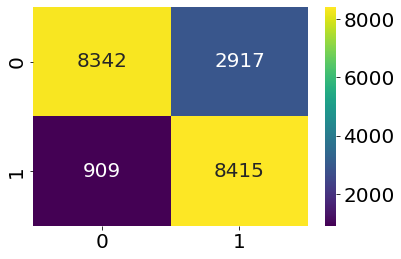

[0.8141184472623039,
 0.8221638578067689,
 0.8217140144598178,
 0.8141161091243772]

In [ ]:
# classification report
modelEvaluation(y_test, y_pred, 'Decison Tree')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(RF_X_train,y_train) # training model on training dataset

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=knn.predict(RF_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Bin-class Set-Accuracy is ", ac)

KNN-Classifier Bin-class Set-Accuracy is  81.41184472623038


========== KNN Classifier ==========

Accuracy on validation set: 0.8141

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81     11259
           1       0.74      0.90      0.81      9324

    accuracy                           0.81     20583
   macro avg       0.82      0.82      0.81     20583
weighted avg       0.83      0.81      0.81     20583



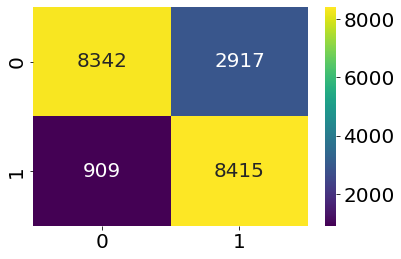

[0.8141184472623039,
 0.8221638578067689,
 0.8217140144598178,
 0.8141161091243772]

In [ ]:
modelEvaluation(y_test, y_pred, 'KNN Classifier')

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=128, input_dim=RF_X_train.shape[1], activation='relu'))
mlp.add(Dense(units=64, activation='relu'))
mlp.add(Dense(units=32, activation='relu'))
mlp.add(Dense(units=16, activation='relu'))
# mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
# training the model on training dataset
history = mlp.fit(RF_X_train, y_train, epochs=25, batch_size=64,validation_split=0.2)

Epoch 1/25
772/772 [==============================] - 3s 3ms/step - loss: 17659.9844 - accuracy: 0.6018 - val_loss: 3936.3953 - val_accuracy: 0.4499
Epoch 2/25
772/772 [==============================] - 2s 2ms/step - loss: 1870.3101 - accuracy: 0.6178 - val_loss: 455.3651 - val_accuracy: 0.6212
Epoch 3/25
772/772 [==============================] - 2s 2ms/step - loss: 489.7482 - accuracy: 0.5791 - val_loss: 309.0762 - val_accuracy: 0.6210
Epoch 4/25
772/772 [==============================] - 2s 2ms/step - loss: 187.8324 - accuracy: 0.5891 - val_loss: 987.6666 - val_accuracy: 0.6364
Epoch 5/25
772/772 [==============================] - 2s 2ms/step - loss: 16.4805 - accuracy: 0.6202 - val_loss: 0.6431 - val_accuracy: 0.6240
Epoch 6/25
772/772 [==============================] - 2s 2ms/step - loss: 5.3870 - accuracy: 0.6199 - val_loss: 0.6685 - val_accuracy: 0.6201
Epoch 7/25
772/772 [==============================] - 2s 2ms/step - loss: 12.2773 - accuracy: 0.6204 - val_loss: 0.6822 - val_a

In [ ]:
y_pred1 = mlp.predict(RF_X_test)
result = []
for i in y_pred1:
    if i > 0.5:
        result.append(1)
    else:
        result.append(0)

========== Multi-Layer Perceptron ==========

Accuracy on validation set: 0.6182

Classification report : 
               precision    recall  f1-score   support

           0       0.16      0.96      0.27      1524
           1       0.99      0.59      0.74     19059

    accuracy                           0.62     20583
   macro avg       0.58      0.77      0.51     20583
weighted avg       0.93      0.62      0.71     20583



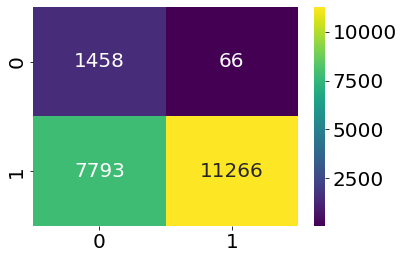

[0.6181800514988097,
 0.5758901843374046,
 0.7739023620394688,
 0.5060150775801329]

In [ ]:
# y_pred=mlp.predict(New_X_test)
modelEvaluation(y_test, result, 'Multi-Layer Perceptron')

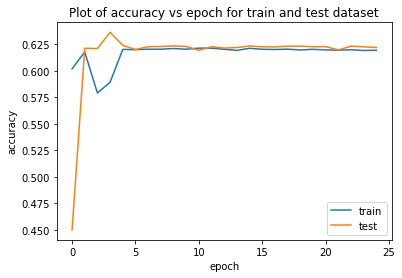

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.rcParams.update({'font.size': 10})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

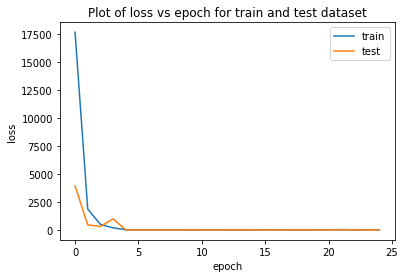

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=RF_X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras mode
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

# fit the keras model on the dataset
history2 = model.fit(RF_X_train, y_train, epochs=25, batch_size=64,validation_split=0.2)


Epoch 1/25
772/772 [==============================] - 2s 2ms/step - loss: 71451.6797 - accuracy: 0.5817 - val_loss: 11178.6025 - val_accuracy: 0.3667
Epoch 2/25
772/772 [==============================] - 1s 2ms/step - loss: 12806.9961 - accuracy: 0.5706 - val_loss: 5483.8311 - val_accuracy: 0.6724
Epoch 3/25
772/772 [==============================] - 1s 2ms/step - loss: 9910.2080 - accuracy: 0.5678 - val_loss: 9834.2256 - val_accuracy: 0.6943
Epoch 4/25
772/772 [==============================] - 1s 2ms/step - loss: 9437.2051 - accuracy: 0.5636 - val_loss: 7223.1973 - val_accuracy: 0.6919
Epoch 5/25
772/772 [==============================] - 1s 2ms/step - loss: 8657.8047 - accuracy: 0.5606 - val_loss: 5364.1621 - val_accuracy: 0.5941
Epoch 6/25
772/772 [==============================] - 1s 2ms/step - loss: 9735.3154 - accuracy: 0.5648 - val_loss: 5808.8984 - val_accuracy: 0.5891
Epoch 7/25
772/772 [==============================] - 1s 2ms/step - loss: 7343.2578 - accuracy: 0.5656 - val_

In [ ]:
y_pred2 = model.predict(RF_X_test)
result2 = []
for i in y_pred2:
    if i > 0.5:
        result2.append(1)
    else:
        result2.append(0)

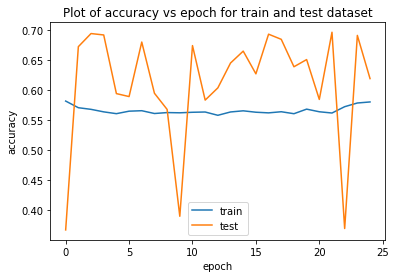

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.rcParams.update({'font.size': 10})
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

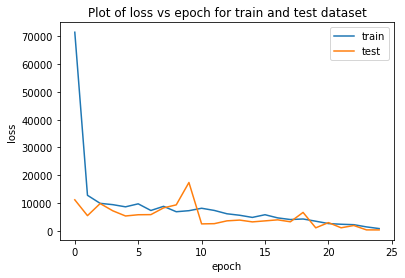

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

========== Neural Network ==========

Accuracy on validation set: 0.6086

Classification report : 
               precision    recall  f1-score   support

           0       0.35      0.61      0.45      5371
           1       0.82      0.61      0.70     15212

    accuracy                           0.61     20583
   macro avg       0.59      0.61      0.57     20583
weighted avg       0.70      0.61      0.63     20583



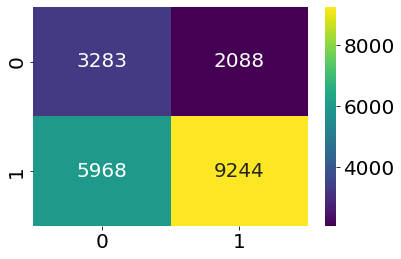

[0.608609046300345, 0.5853117910226399, 0.6094618634672535, 0.5727766478365108]

In [ ]:
# y_pred=mlp.predict(New_X_test)
modelEvaluation(y_test, result2, 'Neural Network')